In [1]:
%config IPCompleter.greedy=True 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import utility as uti
import matplotlib.lines as mlines
import Code_for_cluster.fasta_file.extract_msa as ex_msa

cmaps = np.array([(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202), (0, 0, 0)])/255 # http://tsitsul.in/blog/coloropt/
l = [1, 0, 5, 2, 4, 3, 6, 7]
cmaps = cmaps[l]
sns.set_theme(context='notebook', style='ticks', palette=cmaps, color_codes=True, rc=None)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "arial",
    # Use 10pt font in plots, to maT_ch 10pt font in document
    "font.size": 10,
    "axes.titlesize" : 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth" : 1.3,
    'axes.linewidth' : 1,
}

plt.rcParams.update(tex_fonts)

                
def expected_null_model(fasta_file):
    fasta_file = "Code_for_cluster/fasta_file/" + fasta_file#"Code_for_cluster/fasta_file/Concat_nnn_withFirst.fasta"
    d_species = ex_msa.dictionnary_species(fasta_file)
    l = []
    for key,list_ind in d_species.items():
        if len(list_ind)>=2:
            l.append(len(list_ind))
    return 1/np.mean(l)

label_r = "Natural data"
ls_real_model = "--"

label_0 = "Contacts only"
label_1 = "Phylo rand."
label_2 = "Contacts & phylogeny"
label_3 = "Phylogeny only"
label_4 = "Null model"
ls_4 = "dashdot"
ylabel = "Correct prediction fraction"
xlabel = "Number of sequences in training set"
color_natural_data = cmaps[5]
ls_no_contact = "dotted"


/home/andonis/.local/lib/python3.8/site-packages/seaborn/palettes.py:1021: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette == "reset":


## Delete false coupling

In [2]:
def load_data(inf_type, name_graph, theta, false_contact = None):
    base = "Code_for_cluster/output_inference_partners_generated/"
    end = f"_{inf_type}_{name_graph}_false_contact={false_contact}_theta={theta}.npy"
    print(end)
    no_phylo = np.load(base + "l_plot_no_phylo" + end)
    phylo_equi = np.load(base + "l_plot_phylo_equi_tree" + end)
    real = np.load(base + "l_plot_real_species" + end)
    size_train = np.load(base + "l_size_train" + end)
    return size_train, real, no_phylo, phylo_equi
    

In [3]:
def plot_fig_6(name_graph, fasta_file, arDCA = True, bmDCA = False, theta = 0.0,
              ax_start = None, legend = True):

    if ax_start is None:
        figsize = uti.set_size("article", subplots=(1,2))
        fig, ax =  plt.subplots(figsize=figsize, nrows=1, ncols=2)
    else:
        ax = ax_start
    
    if "4" in name_graph:
        distance = 4
    elif "8" in name_graph:
        distance = 8
    else:
        distance = "unknow"
        
    ### No threshold #####
    if bmDCA:
        inf_type = "bmdca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, theta, false_contact=None)
        ax[0].plot(size_train, real, label = "Natural data", color=color_natural_data)
        ax[0].plot(size_train, no_phylo, label=label_0)
        ax[0].plot(size_train, phylo_equi, label=label_2)
        ax[0].hlines(expected_null_model(fasta_file), size_train[0], size_train[-1], color=cmaps[3], ls=ls_4)

    if arDCA:
        inf_type = "ardca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, theta, false_contact=None)
        ax[1].plot(size_train, real, label = "Natural data", color=color_natural_data)
        ax[1].plot(size_train, no_phylo, label=label_0)
        ax[1].plot(size_train, phylo_equi, label=label_2)
        ax[1].hlines(expected_null_model(fasta_file), size_train[0], size_train[-1], color=cmaps[3], ls=ls_4)

    if ax_start is None:
        ax[0].set_title("A: bmDCA")
        ax[1].set_title("B: arDCA")
        ax[1].set_xlabel(xlabel)
        ax[0].set_xlabel(xlabel)
    
    if bmDCA:
        ax[0].semilogx()
        ax[0].set_ylim(0,1)
        ax[0].margins(x=0)
    
    ax[0].set_ylabel(ylabel)
    ax[1].semilogx()
    ax[1].set_ylim(0,1)
    ax[1].margins(x=0)

    if legend:
        Lhandles = []
        Lhandles.append(mlines.Line2D([],[], ls="-", color="black", label = "Complete score"))
        Lhandles.append(mlines.Line2D([],[], ls="--", color="black", label = f"Score restricted to d<{distance}A"))
        Lhandles.append(mlines.Line2D([],[], ls=ls_no_contact, color="black", label = f"Score restricted to d>{distance}A"))
        Lhandles.append(mlines.Line2D([],[], color=color_natural_data, label = "Natural data"))
        Lhandles.append( mlines.Line2D([], [], color=cmaps[1], markersize=15, label=label_2))
        Lhandles.append( mlines.Line2D([], [], color=cmaps[0], label=label_0 ))
        Lhandles.append( mlines.Line2D([], [], color=cmaps[3], markersize=15, label=label_4, ls=ls_4))
        ax[1].legend(handles=Lhandles,loc="upper right",markerfirst=False, bbox_to_anchor=(1.91, 1.05))

    ### threshold 4 ######
    if bmDCA:
        inf_type = "bmdca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, false_contact=False, theta=theta)
        ax[0].plot(size_train, real, label = "Natural data", color=color_natural_data, ls="--")
        ax[0].plot(size_train, no_phylo, label=label_0, ls="--", color=cmaps[0])
        ax[0].plot(size_train, phylo_equi, label=label_2, ls="--", color=cmaps[1])

    if arDCA:
        inf_type = "ardca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, false_contact=False, theta=theta)
        ax[1].plot(size_train, real, label = "Natural data", color=color_natural_data, ls="--")
        ax[1].plot(size_train, no_phylo, label=label_0, ls="--", color=cmaps[0])
        ax[1].plot(size_train, phylo_equi, label=label_2, ls="--", color=cmaps[1])

    ### threshold 4  of non contact ######
    if bmDCA:
        inf_type = "bmdca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, false_contact=True, theta=theta)
        ax[0].plot(size_train, real, label = "Natural data", color=color_natural_data, ls=ls_no_contact)
        ax[0].plot(size_train, no_phylo, label=label_0, ls=ls_no_contact, color=cmaps[0])
        ax[0].plot(size_train, phylo_equi, label=label_2, ls=ls_no_contact, color=cmaps[1])

    if arDCA:
        inf_type = "ardca"
        size_train, real, no_phylo, phylo_equi = load_data(inf_type, name_graph, false_contact=True, theta=theta)
        ax[1].plot(size_train, real, label = "Natural data", color=color_natural_data, ls=ls_no_contact)
        ax[1].plot(size_train, no_phylo, label=label_0, ls=ls_no_contact, color=cmaps[0])
        ax[1].plot(size_train, phylo_equi, label=label_2, ls=ls_no_contact, color=cmaps[1])

    if legend:
        plt.savefig(f"figures/FIG_6_{name_graph}_theta={theta}.eps", bbox_inches = "tight")

_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=None_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=None_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=False_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=False_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=True_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


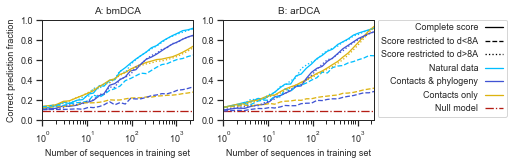

In [4]:
name_graph = "prot_HK_and_RR_Threshold_8_CarbonAlpha"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True)

_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=None_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=None_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=False_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=False_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=True_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_CarbonAlpha_false_contact=True_theta=0.2.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


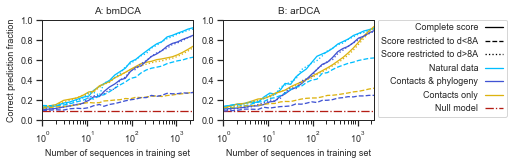

In [5]:
name_graph = "prot_HK_and_RR_Threshold_8_CarbonAlpha"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True, theta=0.2)

_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=None_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=False_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=True_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


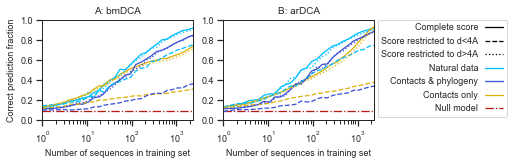

In [6]:
name_graph = "prot_HK_and_RR_Threshold_4_MinAllDist"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True)

_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=None_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=None_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=False_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=False_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=True_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_4_MinAllDist_false_contact=True_theta=0.2.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


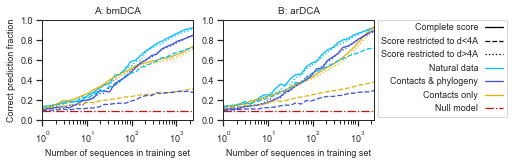

In [7]:
name_graph = "prot_HK_and_RR_Threshold_4_MinAllDist"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True, theta=0.2)

_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


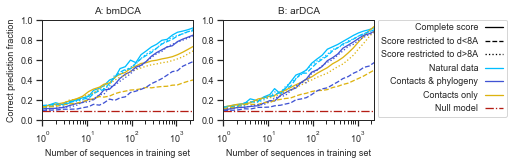

In [8]:
name_graph = "prot_HK_and_RR_Threshold_8_MinAllDist"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True)

_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.2.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.2.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.2.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


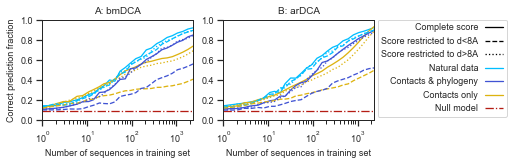

In [9]:
name_graph = "prot_HK_and_RR_Threshold_8_MinAllDist"
fasta_file = "Concat_nnn_withFirst.fasta"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=True, theta=0.2)

_ardca_prot_MalG_MalK_Threshold_8_CarbonAlpha_false_contact=None_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_CarbonAlpha_false_contact=False_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_CarbonAlpha_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


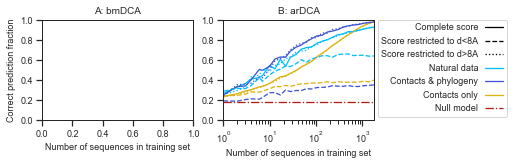

In [10]:
name_graph = "prot_MalG_MalK_Threshold_8_CarbonAlpha"
fasta_file = "MALG_MALK_cov75_hmmsearch_sorted_withLast_b.fas"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=False)

_ardca_prot_MalG_MalK_Threshold_4_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_4_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_4_MinAllDist_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


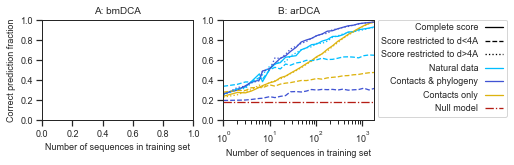

In [11]:
name_graph = "prot_MalG_MalK_Threshold_4_MinAllDist"
fasta_file = "MALG_MALK_cov75_hmmsearch_sorted_withLast_b.fas"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=False)

_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


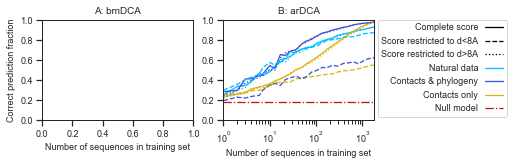

In [12]:
name_graph = "prot_MalG_MalK_Threshold_8_MinAllDist"
fasta_file = "MALG_MALK_cov75_hmmsearch_sorted_withLast_b.fas"
plot_fig_6(name_graph, fasta_file, arDCA=True, bmDCA=False)

_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_bmdca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy
_ardca_prot_HK_and_RR_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=None_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=False_theta=0.0.npy
_ardca_prot_MalG_MalK_Threshold_8_MinAllDist_false_contact=True_theta=0.0.npy


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


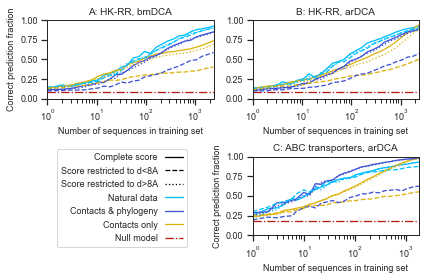

In [41]:
distance = 8
name_graph_1 = "prot_HK_and_RR_Threshold_8_MinAllDist"
fasta_file = "Concat_nnn_withFirst.fasta"
figsize = uti.set_size("article", subplots=(2,2))
fig, ax =  plt.subplots(figsize=figsize, nrows=2, ncols=2)
plot_fig_6(name_graph_1, fasta_file, arDCA=True, bmDCA=True, legend=False, ax_start=ax[0])
name_graph_2 = "prot_MalG_MalK_Threshold_8_MinAllDist"
fasta_file = "MALG_MALK_cov75_hmmsearch_sorted_withLast_b.fas"
plot_fig_6(name_graph_2, fasta_file, arDCA=True, bmDCA=False, legend=False, ax_start=ax[1])
plt.tight_layout(h_pad=3)
ax[0,0].set_title("A: HK-RR, bmDCA")
ax[0,1].set_title("B: HK-RR, arDCA")
ax[1,1].set_title("C: ABC transporters, arDCA")
ax[0,0].set_xlabel("Number of sequences in training set")
ax[1,1].set_xlabel("Number of sequences in training set")
ax[0,1].set_xlabel("Number of sequences in training set")
ax[1,1].set_ylabel("Correct prediction fraction")
fig.delaxes(ax[1,0])
Lhandles = []
Lhandles.append(mlines.Line2D([],[], ls="-", color="black", label = "Complete score"))
Lhandles.append(mlines.Line2D([],[], ls="--", color="black", label = f"Score restricted to d<{distance}A"))
Lhandles.append(mlines.Line2D([],[], ls=ls_no_contact, color="black", label = f"Score restricted to d>{distance}A"))
Lhandles.append(mlines.Line2D([],[], color=color_natural_data, label = "Natural data"))
Lhandles.append( mlines.Line2D([], [], color=cmaps[1], markersize=15, label=label_2))
Lhandles.append( mlines.Line2D([], [], color=cmaps[0], label=label_0 ))
Lhandles.append( mlines.Line2D([], [], color=cmaps[3], markersize=15, label=label_4, ls=ls_4))
ax[1,1].legend(handles=Lhandles,loc="upper right",markerfirst=False, bbox_to_anchor=(-0.37, 1.15))
plt.savefig(f"figures/FIG_6_{name_graph_1}_and_{name_graph_2}.eps", bbox_inches = "tight")